# Меня ждут миллионы

Обучите простую модель предсказания цены акций. Используйте один из рассмотренных на лекции "Временные последовательности" алгоритмов предсказания рядов. Можно использовать и более сложные алгоритмы предсказания рядов


1. Найдите данные о цене любого биржевого актива

    Данные должны содержать значение цены актива как минимум за каждый день и длительностю как минимум за год. 

    Найти данные можно на kaggle или использовать FAANG датасет из 1 лабораторной


2. Предобработайте данные

    Временной ряд сложно предсказывать по дням. Сделайте ряд по неделям или месяцам
   
    Удалите из ряда тренд, если он есть. Используйте другие рассмотренные на лекции приёмы


3. Обучите модель
    
    Обучите модель на 80% временного ряда
    
    Предскажите оставшиеся 20% (как минимум 3 точки) ряда с помощью модели 
    
    Отобразите на графике предсказание модели и истинные данные


4. Посчитайте метрику

    Метрика должна отражать разницу между предсказанными и истинными данными. Можно выбрать меру MAPE, можно предложить свою

In [7]:
import pandas as pd

apple_price = pd.read_csv('./Apple_Historical_StockPrice2.csv')
apple_price.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-28,26.500000,26.547501,26.264999,26.297501,24.459534,77645600
1,2016-03-29,26.222500,26.947500,26.219999,26.920000,25.038527,124760400
2,2016-03-30,27.162500,27.605000,27.150000,27.389999,25.475679,182404400
3,2016-03-31,27.430000,27.475000,27.219999,27.247499,25.343138,103553600
4,2016-04-01,27.195000,27.500000,27.049999,27.497499,25.575666,103496000
5,2016-04-04,27.605000,28.047501,27.567499,27.780001,25.838421,149424800
6,2016-04-05,27.377501,27.682501,27.355000,27.452499,25.533810,106314800
7,2016-04-06,27.557501,27.745001,27.299999,27.740000,25.801216,105616400
8,2016-04-07,27.487499,27.605000,27.030001,27.135000,25.238501,127207600
9,2016-04-08,27.227501,27.442499,27.042500,27.165001,25.266407,94326800


In [8]:
apple_price.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
apple_price['Date'] = pd.to_datetime(apple_price['Date'], format='%Y-%m-%d')

apple_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1260 non-null   datetime64[ns]
 1   Open       1260 non-null   float64       
 2   High       1260 non-null   float64       
 3   Low        1260 non-null   float64       
 4   Close      1260 non-null   float64       
 5   Adj Close  1260 non-null   float64       
 6   Volume     1260 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.0 KB


In [10]:
apple_price.drop(['Open', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1, inplace = True)

apple_price.head()

,Date,High
0,2016-03-28,26.547501
1,2016-03-29,26.947500
2,2016-03-30,27.605000
3,2016-03-31,27.475000
4,2016-04-01,27.500000


<AxesSubplot:title={'center':'Original'}, ylabel='High'>

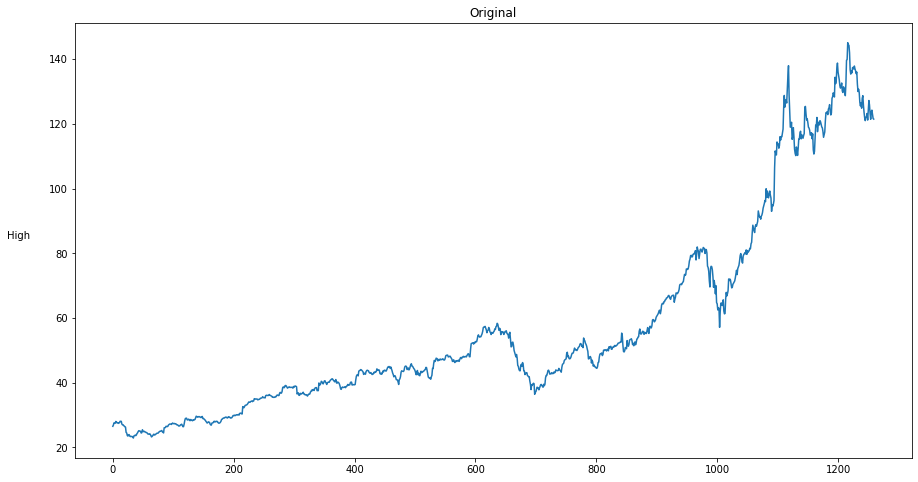

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.title('Original')
plt.ylabel('High', rotation=0, labelpad=30)
apple_price['High'].plot()

In [13]:
import datetime
last_month = -1

df = pd.DataFrame(columns=['Date', 'High'])
for row in apple_price.itertuples():
    if (last_month != row.Date.month):
        last_month = row.Date.month
        df = df.append({'Date': datetime.date(row.Date.year, row.Date.month, 1),
                        'High': row.High}, ignore_index=True)
        
apple_price = df
apple_price.shape

(61, 2)

In [20]:
apple_price = apple_price.set_index(['Date'])

apple_price.head(10)

,High
Date,
2016-03-01,26.547501
2016-04-01,27.500000
2016-05-01,23.520000
2016-06-01,24.885000
2016-07-01,24.117500
2016-08-01,26.537500
2016-09-01,26.700001
2016-10-01,28.262501
2016-11-01,28.442499


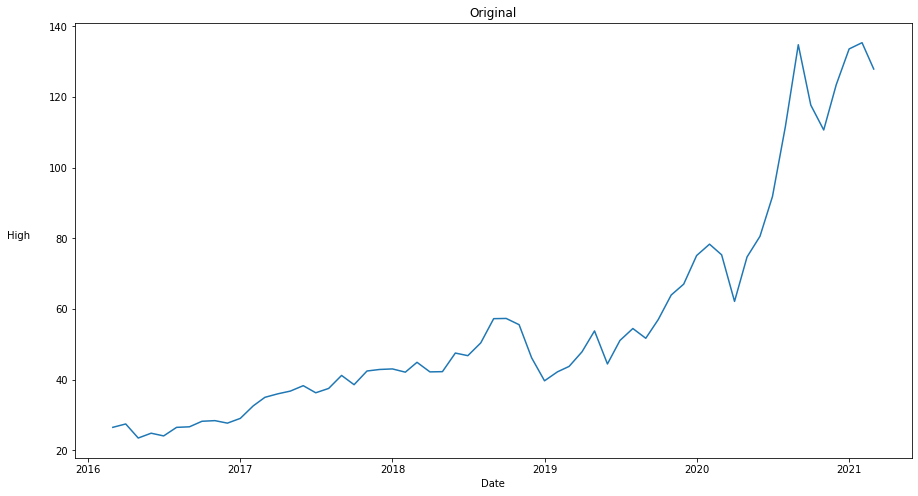

In [21]:
plt.figure(figsize=(15, 8))
plt.title('Original')
plt.ylabel('High', rotation=0, labelpad=30)
apple_price['High'].plot();

<Figure size 1080x1440 with 0 Axes>

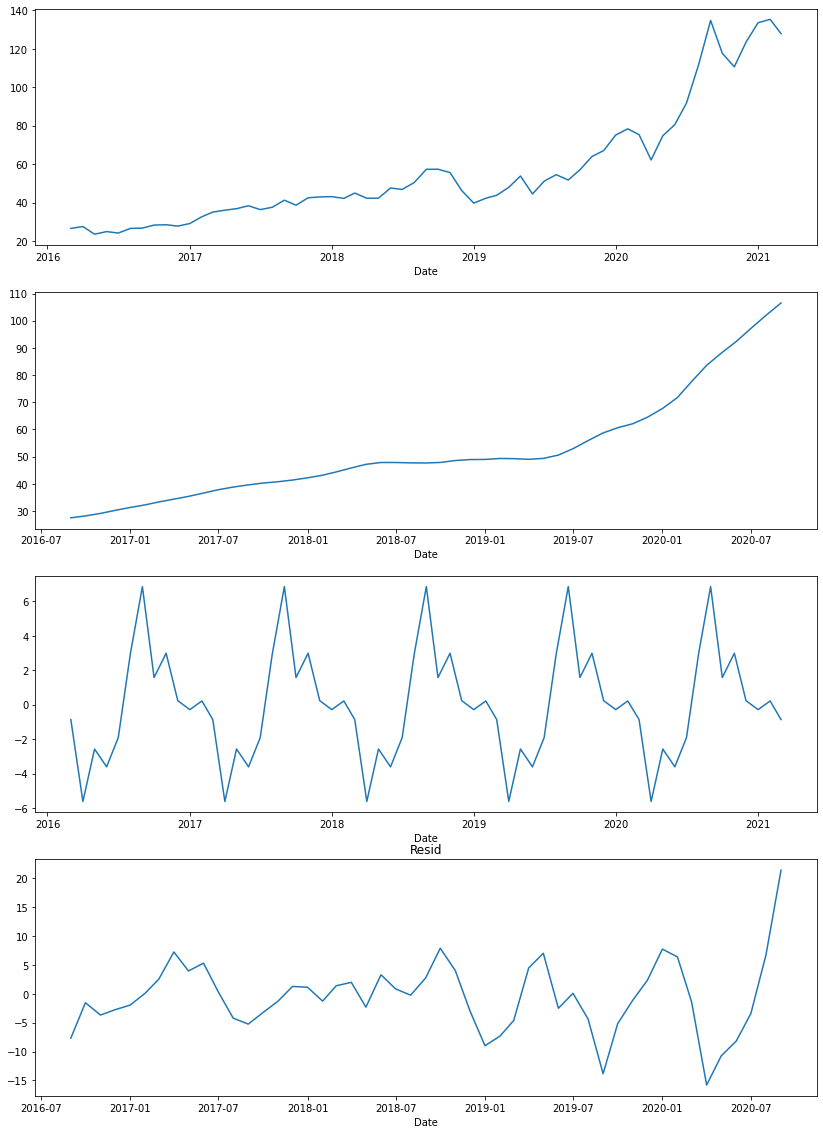

In [22]:
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(15, 20))
decomposition = seasonal_decompose(apple_price['High'], period=12)
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 20))

plt.title('Observed')
decomposition.observed.plot(ax=ax[0])

plt.title('Trend')
decomposition.trend.plot(ax=ax[1])

plt.title('Seasonal')
decomposition.seasonal.plot(ax=ax[2])

plt.title('Resid')
decomposition.resid.plot(ax=ax[3]);

In [23]:
from statsmodels.tsa.stattools import adfuller

p_value = adfuller(apple_price['High'])[1]

print(
    f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
    f'{round(p_value, 4)} > 0.05. Нулевая гипотеза не отвергается в пользу альтернативной!'
)

Полученный уровень значимости (p-value): 0.9938. 0.9938 > 0.05. Нулевая гипотеза не отвергается в пользу альтернативной!


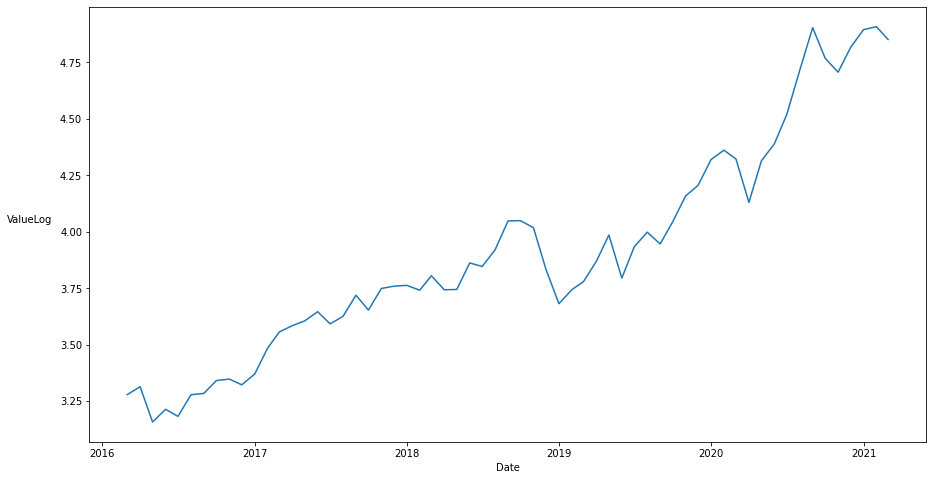

In [28]:
import numpy as np
apple_price['ValueLog'] = np.log(apple_price['High'])

plt.figure(figsize=(15, 8))
plt.ylabel('ValueLog', rotation=0, labelpad=30)
apple_price['ValueLog'].plot();

Полученный уровень значимости (p-value): 0.0. 0.0 > 0.05. Нулевая гипотеза не отвергается в пользу альтернативной!


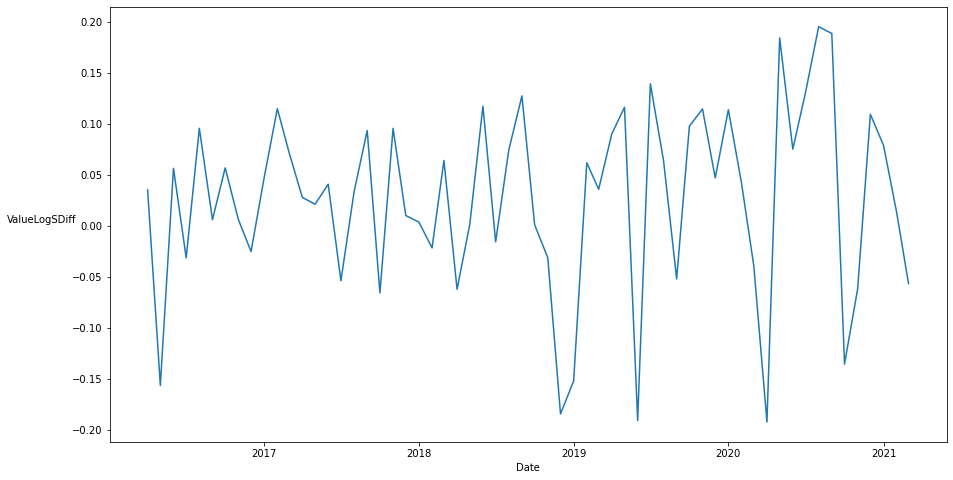

In [33]:
apple_price['ValueLogSDiff'] = apple_price['ValueLog'] - apple_price['ValueLog'].shift(1)
p_value = adfuller(apple_price['ValueLogSDiff'][1:])[1]

print(
    f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
    f'{round(p_value, 4)} > 0.05. Нулевая гипотеза не отвергается в пользу альтернативной!'
)

plt.figure(figsize=(15, 8))
plt.ylabel('ValueLogSDiff', rotation=0, labelpad=30)
apple_price['ValueLogSDiff'].plot();

Полученный уровень значимости (p-value): 0.0. 0.0 < 0.05. Нулевая гипотеза отвергается в пользу альтернативной!


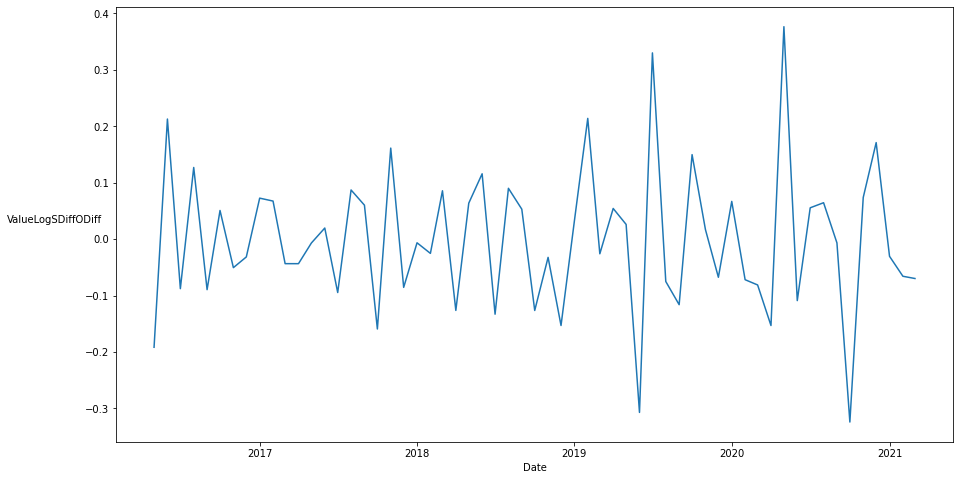

In [41]:
apple_price['ValueLogSDiffODiff'] = apple_price['ValueLogSDiff'] - apple_price['ValueLogSDiff'].shift(1)
p_value = adfuller(apple_price['ValueLogSDiffODiff'][2:])[1]

print(
    f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
    f'{round(p_value, 4)} < 0.05. Нулевая гипотеза отвергается в пользу альтернативной!'
)

plt.figure(figsize=(15, 8))
plt.ylabel('ValueLogSDiffODiff', rotation=0, labelpad=30)
apple_price['ValueLogSDiffODiff'].plot();

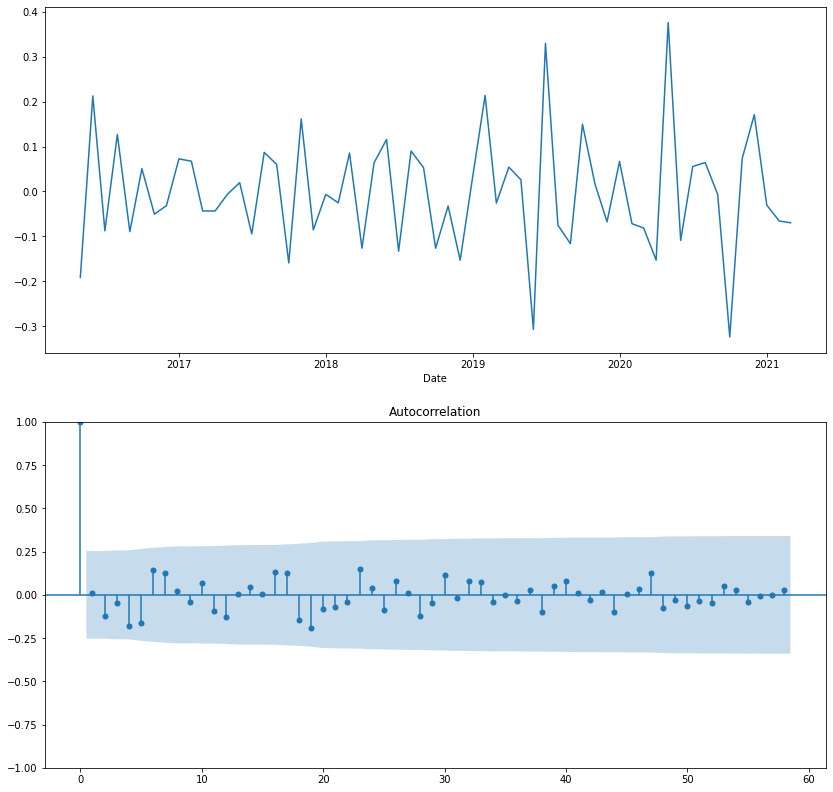

In [42]:
from statsmodels.graphics.tsaplots import plot_acf

# Построим корелограмму и проверим наличие значимых коррелаций
plt.figure(figsize=(14, 14))

ax = plt.subplot(211)
apple_price['ValueLogSDiffODiff'].plot(ax=ax)

ax = plt.subplot(212)
plot_acf(apple_price['ValueLogSDiff'][1:], lags=58, ax=ax);

(array([0.48400045, 0.24200023, 1.69400158, 2.9040027 , 3.14600293,
        3.63000338, 0.9680009 , 0.72600068, 0.        , 0.48400045]),
 array([-0.32401852, -0.25398077, -0.18394301, -0.11390526, -0.0438675 ,
         0.02617026,  0.09620801,  0.16624577,  0.23628352,  0.30632128,
         0.37635903]),
 <BarContainer object of 10 artists>)

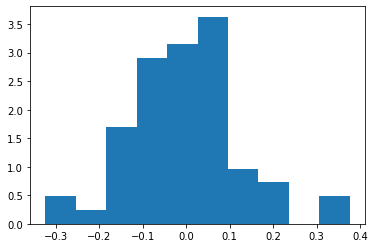

In [43]:
plt.hist(apple_price['ValueLogSDiffODiff'], density=True, bins=10)


In [47]:
d=1
D=1

qs = range(1, 5)
Qs = range(1, 3)

ps = range(1, 5)
Ps = range(3, 5)


size = len(apple_price.ValueLog)
percentile = int(0.8 * size)

X_train = apple_price['ValueLog'][:percentile]
X_test = apple_price['ValueLog'][percentile:]
y_train = apple_price['High'][:percentile]
y_test = apple_price['High'][percentile:]

In [49]:
from itertools import product
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

64

In [51]:
%%time
#warnings.filterwarnings('ignore')
import statsmodels.api as sm
from tqdm import tqdm

results = []
best_aic = float("inf")

for param in tqdm(parameters_list):
    try:
        model = sm.tsa.statespace.SARIMAX(
            apple_price['ValueLog'], 
            order=(param[0], d, param[1]), 
            seasonal_order=(param[2], D, param[3], 12)
        ).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

#warnings.filterwarnings('default')

  0%|                                                                                           | 0/64 [00:00<?, ?it/s]c:\users\sanev\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\sanev\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\sanev\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\users\sanev\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: Converge

Wall time: 6min 41s


In [52]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

      parameters        aic
0   (1, 1, 3, 1) -60.210820
16  (2, 1, 3, 1) -59.922593
4   (1, 2, 3, 1) -59.895504
52  (4, 2, 3, 1) -58.680896
48  (4, 1, 3, 1) -58.512056


In [53]:
print(best_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           ValueLog   No. Observations:                   61
Model:             SARIMAX(1, 1, 1)x(3, 1, 1, 12)   Log Likelihood                  37.105
Date:                            Tue, 07 Dec 2021   AIC                            -60.211
Time:                                    10:27:44   BIC                            -47.112
Sample:                                03-01-2016   HQIC                           -55.261
                                     - 03-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5520      0.608     -0.907      0.364      -1.744       0.640
ma.L1          0.6812      0.573   

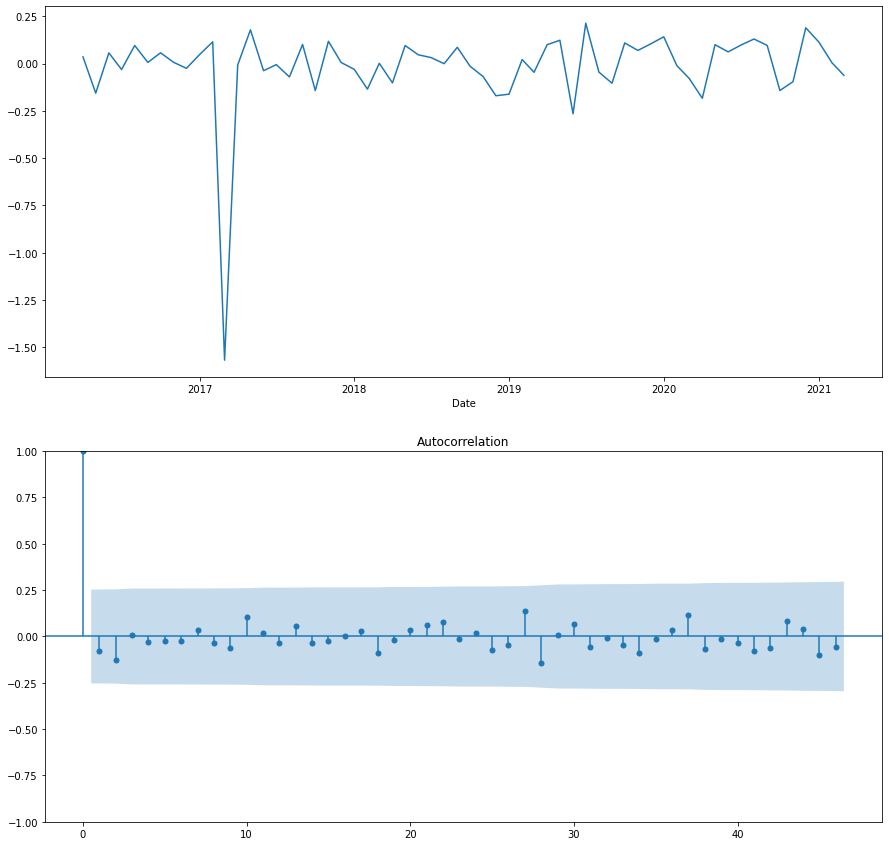

In [54]:
plt.figure(figsize=(15,15))

plt.subplot(211)
best_model.resid[1:].plot()

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[1:].values.squeeze(), lags=46, ax=ax);

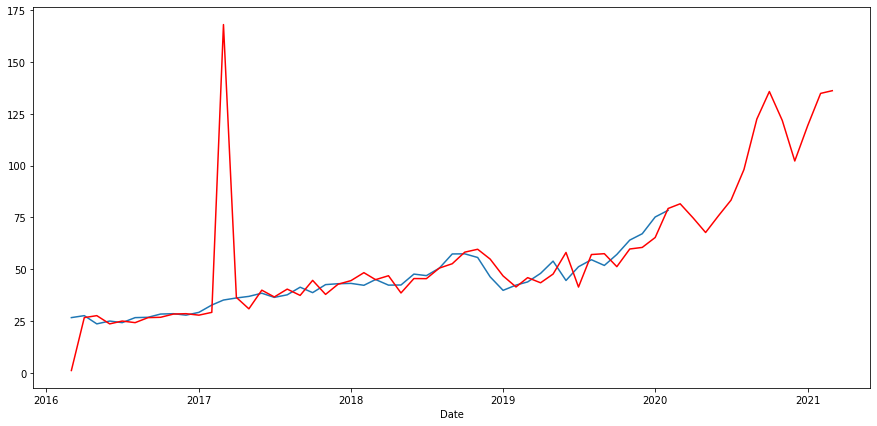

In [55]:
y_train_pred = np.exp(best_model.fittedvalues)

plt.figure(figsize=(15,7))

y_train.plot()
y_train_pred.plot(c='r');

<AxesSubplot:xlabel='Date'>

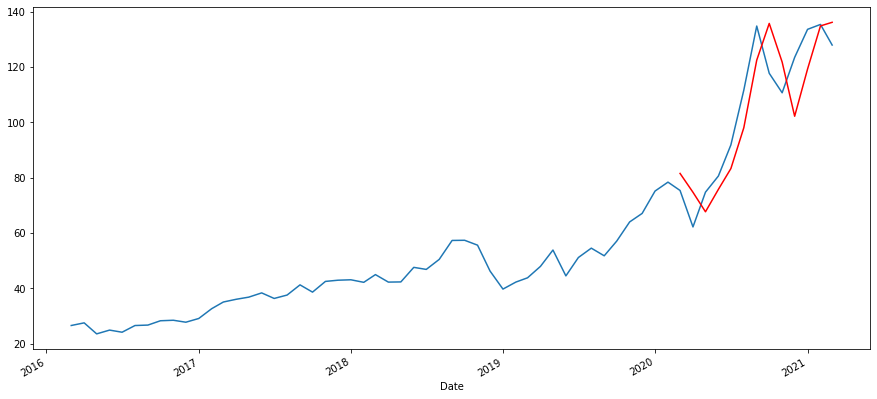

In [57]:
predict_len = size - percentile
y_pred = np.exp(best_model.predict(start=percentile, end=percentile + predict_len - 1))

plt.figure(figsize=(15,7))
apple_price['High'].plot()
y_pred.plot(c='r')

In [58]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_pred, y_test)

0.10543837826374927